<a href="https://colab.research.google.com/github/Chupocabra/comp_tech/blob/main/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_Practise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Давайте воспользуемся генератором случайных чисел R для нормального распределения/ Cписки значений, генерируемые функцией rnorm(), берутся из популяции, которая действительно имеет нормальное распределение.

* Сгенерируйте список из 10 случайных нормально распределенных чисел со средним значением 15 и стандартным отклонением 3.
* С помощью функции hist() постройте гистограмму распределения этих чисел.
* Постройте график QQ-plot из сгенерированных чисел.
* Повторите действия несколько раз (не менее десятка раз). Для каждого из них посмотрите на гистограммы и графики QQ. Подумайте, чем они отличаются от  нормального распределения (но помните, что каждая из этих выборок взята из действительно нормальной популяции).

2. Файл "mammals.csv" содержит информацию о массе тела различных видов млекопитающих.

* Изобразите распределение массы тела и опишите его форму. Похоже ли это на нормальное распределение?
* Преобразуйте данные о массе тела с помощью логарифмического преобразования. Постройте график распределения логарифмической массы тела. Опишите новое распределение и проверьте его на нормальность. (Попробуйте 2-3 распределения и выберите лучшее).

In [1]:
%load_ext rpy2.ipython

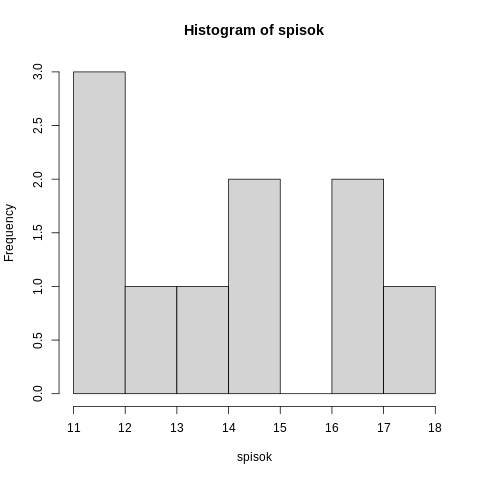

In [2]:
%%R
spisok = rnorm(10, 15, 3)
hist(spisok)


	Shapiro-Wilk normality test

data:  spisok
W = 0.89898, p-value = 0.2135



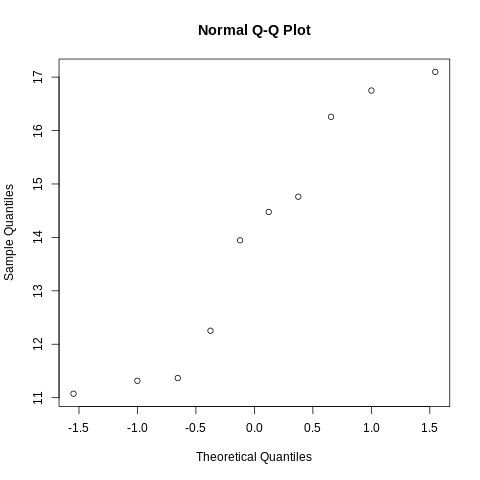

In [3]:
%%R
qqnorm(spisok)
shapiro.test(spisok)

In [5]:
%%R
library(data.table)
animals <- fread("/content/sample_data/mammals.csv")


	Shapiro-Wilk normality test

data:  animals$body_mass_kg
W = 0.22239, p-value < 2.2e-16



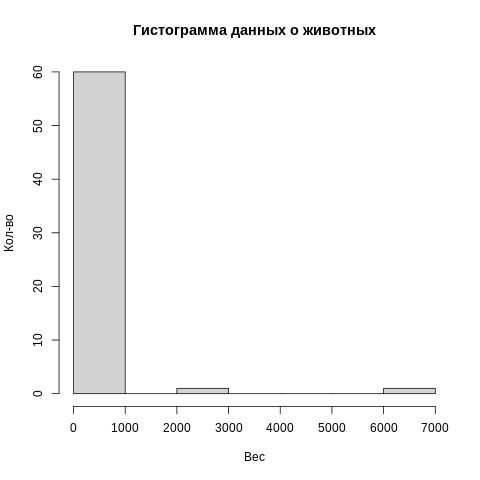

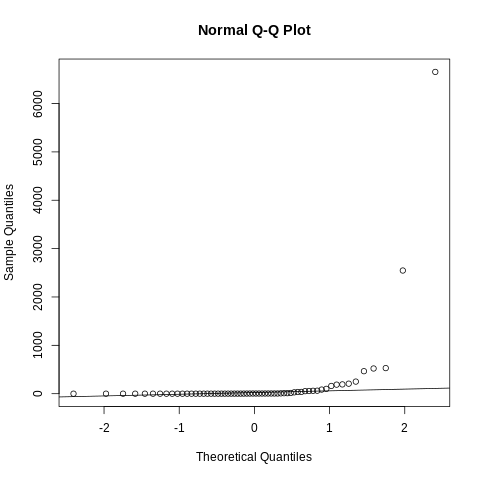

In [ ]:
%%R
hist(animals$body_mass_kg, main = "Гистограмма данных о животных", xlab = "Вес", ylab = "Кол-во")
qqnorm(animals$body_mass_kg)
qqline(animals$body_mass_kg)
shapiro.test(animals$body_mass_kg)


	Shapiro-Wilk normality test

data:  log(animals$body_mass_kg)
W = 0.98248, p-value = 0.5192



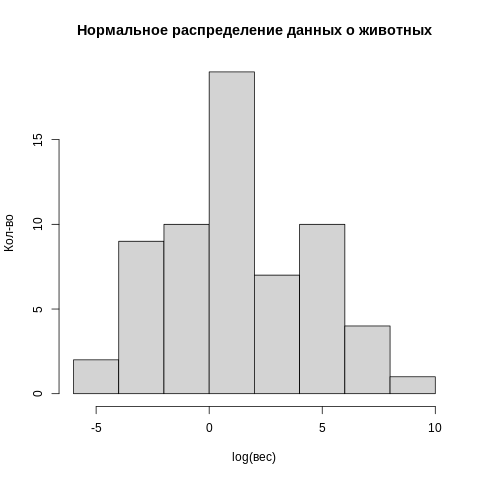

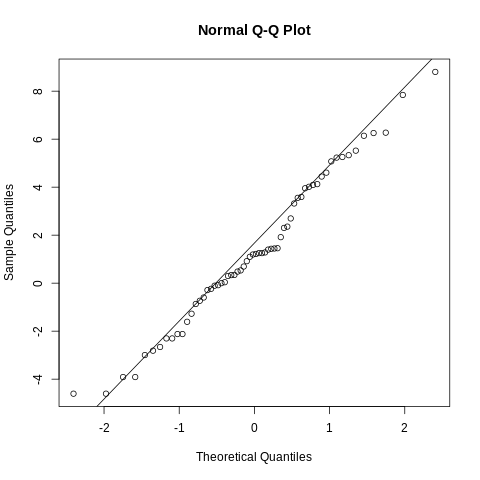

In [6]:
%%R
hist(log(animals$body_mass_kg), main = "Нормальное распределение данных о животных", xlab = "log(вес)", ylab = "Кол-во")
qqnorm(log(animals$body_mass_kg))
qqline(log(animals$body_mass_kg))
shapiro.test(log(animals$body_mass_kg))


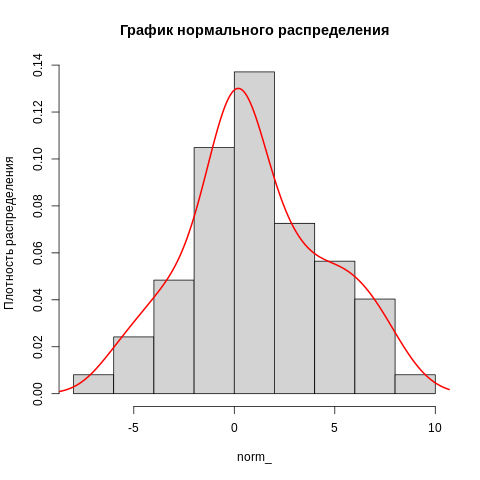

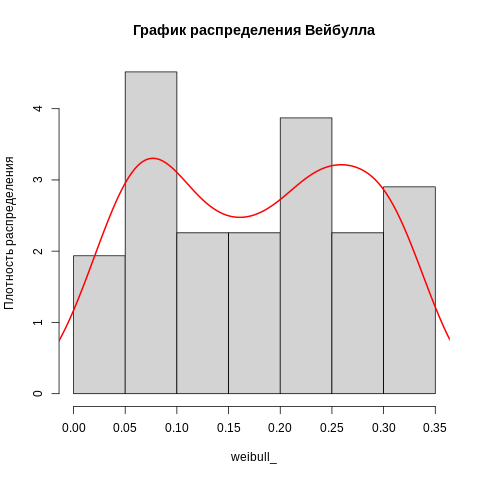

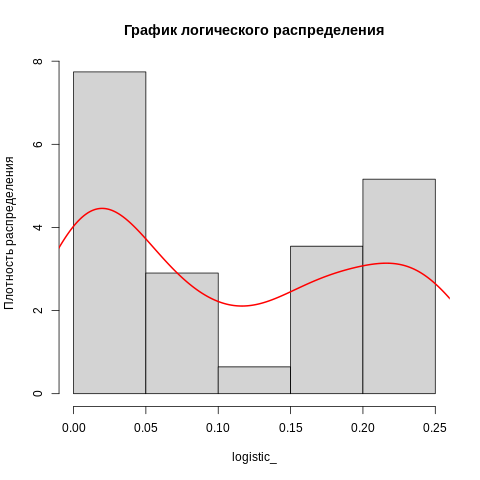

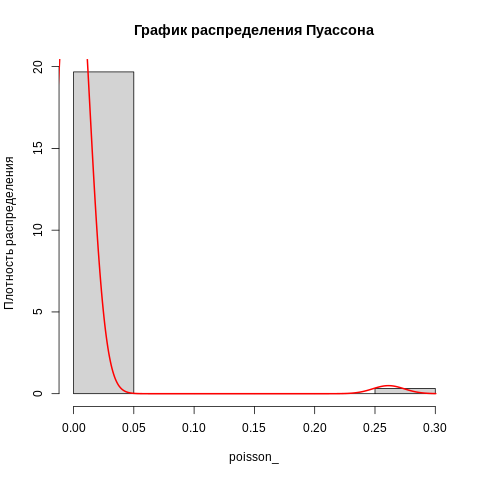

In [57]:
%%R
library(MASS)
weibull = fitdistr(abs(log(animals$body_mass_kg)) + 0.0001, "weibull")
normal = fitdistr(log(animals$body_mass_kg), "normal")
logistic = fitdistr(log(animals$body_mass_kg), "logistic")
poisson = fitdistr(log(animals$body_mass_kg), "poisson")

norm_ = rnorm(log(animals$body_mass_kg),mean = normal$estimate[1], sd = normal$estimate[2] )
weibull_ = dweibull(abs(log(animals$body_mass_kg)) + 0.0001, weibull$estimate[1], weibull$estimate[2])
logistic_ = dlogis(log(animals$body_mass_kg))
poisson_ = dpois(log(animals$body_mass_kg), poisson$estimate[1])

hist(norm_, freq= FALSE,
     main = "График нормального распределения",
     ylab = "Плотность распределения")
lines(density(norm_), col = "red", lwd = 2)

hist(weibull_, freq= FALSE,
     main = "График распределения Вейбулла",
     ylab = "Плотность распределения")
lines(density(weibull_), col = "red", lwd = 2)

hist(logistic_, freq= FALSE,
     main = "График логического распределения",
     ylab = "Плотность распределения")
lines(density(logistic_), col = "red", lwd = 2)

hist(poisson_, freq= FALSE,
     main = "График распределения Пуассона",
     ylab = "Плотность распределения")
lines(density(poisson_), col = "red", lwd = 2)